<a href="https://colab.research.google.com/github/nimasajedi1/ReFED-Code-Challenge/blob/main/ReFED_Code_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unnamed: 0               0
year                     0
state                    0
commodity_name           0
refed_food_department    0
refed_food_category      0
acres_planted            0
acres_harvested          0
us_dollars_harvested     0
tons_harvested           0
percent_maturity         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             927 non-null    int64  
 1   year                   927 non-null    int64  
 2   state                  927 non-null    object 
 3   commodity_name         927 non-null    object 
 4   refed_food_department  927 non-null    object 
 5   refed_food_category    927 non-null    object 
 6   acres_planted          927 non-null    float64
 7   acres_harvested        927 non-null    float64
 8   us_dollars_harvested   927 non-null    float64
 9   tons_har

tons_never_harvested
year refed_food_department                      
2016 dry goods                     101240.000000
     produce                       609818.606878
2017 dry goods                      84545.000000
     produce                       651984.977968
2018 dry goods                      49612.500000
     produce                       632643.073394

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


not_marketable       inedible   bad_weather  \
year refed_food_department                                                
2016 dry goods                28347.200000   28347.200000   4252.080000   
     produce                 170749.209926  170749.209926  25612.381489   
2017 dry goods                23672.600000   23672.600000   3550.890000   
     produce                 182555.793831  182555.793831  27383.369075   
2018 dry goods                13891.500000   13891.500000   2083.725000   
     produce                 177140.060550  177140.060550  26571.009083   

                            pests_disease  market_dynamics          other  
year refed_food_department                                                 
2016 dry goods                  63.781200        13.161200   40216.577600  
     produce                   384.185722        79.276419  242244.343396  
2017 dry goods                  53.263350        10.990850   33584.655800  
     produce                   410.750536        84.758047  258994.512648  
2018 dry goods                  31.255875         6.449625   19708.069500  
     produce                   398.565136        82.243600  251311.134475

Unnamed: 0               0
year                     0
state                    0
commodity_name           0
refed_food_department    0
refed_food_category      0
acres_planted            0
acres_harvested          0
us_dollars_harvested     0
tons_harvested           0
percent_maturity         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             483 non-null    int64  
 1   year                   483 non-null    int64  
 2   state                  483 non-null    object 
 3   commodity_name         483 non-null    object 
 4   refed_food_department  483 non-null    object 
 5   refed_food_category    483 non-null    object 
 6   acres_planted          483 non-null    float64
 7   acres_harvested        483 non-null    float64
 8   us_dollars_harvested   483 non-null    float64
 9   tons_har

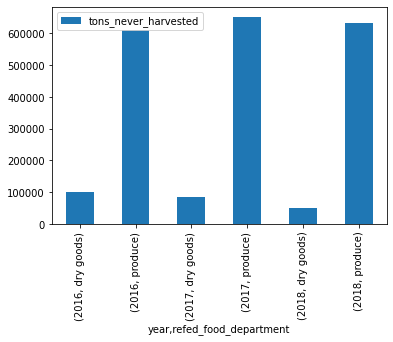

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import CSV into Dataframe Part 1.1

df = pd.read_csv('https://raw.githubusercontent.com/nimasajedi1/ReFED-Code-Challenge/main/farm_part_1.csv')

#Convert all strings to lower case Part 1.2

df = df.applymap(lambda s: s.lower() if type(s) == str else s)

#Data Cleansing and Check Part 1.3

#Info shows that there are no nulls in any of the data points, if there were any null values, the row associated would be dropped
print(df.isnull().sum())
#Info also shows that all of the datatypes are as expected with floats for numerical values and objects for strings
print(df.info())
#Duplicate rows check confirms that no 2 rows in the sample dataset are identical, if there was a duplicate row it would be dropped
print(np.any(df.duplicated()))

#Min, Max check of the dataset to use sample as baseline for every numerical column (drop values 25% above max or 25% below min) 
#in comments mention that this is not best way to check numerical values 
#but guardrail values should be selected based on the data source (whats min farm size to be in USDA report) and what is largest farm in US
#By looking at the numerical values for acres planted, there is a state that had 1.09 million acres planted for a specific crop and a state with only 330 acres for a specific crop.
#When looking at another years data, it is worthwhile to run the same check to verify any rows with more than 1.36 million acres planted (1.09 million*1.25) or less than 248 acres planted (330*0.75)
print(df.describe())

#This dataset is extremely clean and some other checks that might be valuable are described below
#To consider when doing the data check for many CSV files: if dataset is too large, columns to drop before combining if some information is not needed pre or post calculation)

#Part 1.4 Creating v1 version called clean as csv
df.to_csv(path_or_buf=r"v1_clean.csv",sep=',',index=False)

#Part 1.5 Tons Never Harvested calculation
df['acres_unharvested'] = df['acres_planted']-df['acres_harvested']
df['yields_tons_per_acre'] = df['tons_harvested']/df['acres_harvested']
df['price_per_ton'] = df['us_dollars_harvested']/df['tons_harvested']
df['tons_never_harvested'] = df['acres_unharvested']*df['yields_tons_per_acre']*df['percent_maturity']

#Part 1.6 Load never harvest causes csv into dataframe
df1 = pd.read_csv('https://raw.githubusercontent.com/nimasajedi1/ReFED-Code-Challenge/main/farm_not_harvested_causes.csv')

#Data check to see if all rates add to 1
print(df1['rate'].sum())

#Part 1.7 Calculate amount not harvested by cause
for i in range(len(df1)):
    df[df1.loc[i].at['cause']] = (df1.loc[i].at['rate'])*df['tons_never_harvested']

#Part 1.8 Creating v1 version called prod as csv
df.to_csv(path_or_buf=r"v1_prod.csv",sep=',',index=False)

#Part 2.1 creating aggregate table for year and department
df2 = df.groupby(['year','refed_food_department'])['tons_never_harvested'].sum().to_frame()

#Part 2.2 plotting table generated in 2.1
display(df2)

#Part 2.3 creating aggregate table for food waste causes
df3 = df.groupby(['year','refed_food_department'])['not_marketable','inedible','bad_weather','pests_disease','market_dynamics','other'].sum()

#Part 2.4 plotting table generated in 2.3
display(df3)

#Part 3.1 load new dataset
df4 = pd.read_csv('https://raw.githubusercontent.com/nimasajedi1/ReFED-Code-Challenge/main/farm_update_part_3.csv')

#Part 3.2 update new dataset and combine with previous dataset
df4 = df4.applymap(lambda s: s.lower() if type(s) == str else s)
print(df4.isnull().sum())
print(df4.info())
print(np.any(df4.duplicated()))
print(df4.describe())
#Data update also looks extremely clean with no nulls, duplicates, improper formatting, or data value issues

df4['acres_unharvested'] = df4['acres_planted']-df4['acres_harvested']
df4['yields_tons_per_acre'] = df4['tons_harvested']/df4['acres_harvested']
df4['price_per_ton'] = df4['us_dollars_harvested']/df4['tons_harvested']
df4['tons_never_harvested'] = df4['acres_unharvested']*df4['yields_tons_per_acre']*df4['percent_maturity']

for i in range(len(df1)):
    df4[df1.loc[i].at['cause']] = (df1.loc[i].at['rate'])*df4['tons_never_harvested']
    
frames = [df,df4]
result = pd.concat(frames)

#Part 3.3 Save combined datasets to V2 production dataset
result.to_csv(path_or_buf=r"v2_prod.csv",sep=',',index=False)